Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',-1)

# Content

In [ ]:
crime= pd.read_csv('/content/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.shape

(50, 5)

In [ ]:
crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#Data Exploration

In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
#Missing Values
#null count for columns
null_count_col = crime.isnull().sum().value_counts(ascending=False)
null_percent_col=(crime.isnull().sum()*100/len(crime)).value_counts(ascending=False)
print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)


Null Count for Columns:

 0    5
dtype: int64 

Null Percentage for Columns:

 0.0    5
dtype: int64


In [ ]:
#null count for rows
null_count_row=crime.isnull().sum(axis=1).value_counts(ascending=False)
null_percent_row=(crime.isnull().sum(axis=1)*100/len(crime)).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    50
dtype: int64 

Null Percentage for Rows:

 0.0    50
dtype: int64


In [ ]:
#duplicate values
crime.duplicated().sum()

0

In [ ]:
crime[crime.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


#Exploratory Data Analysis

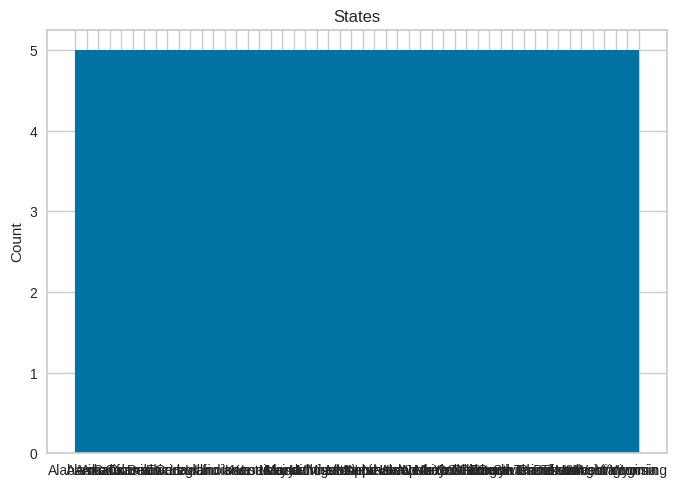

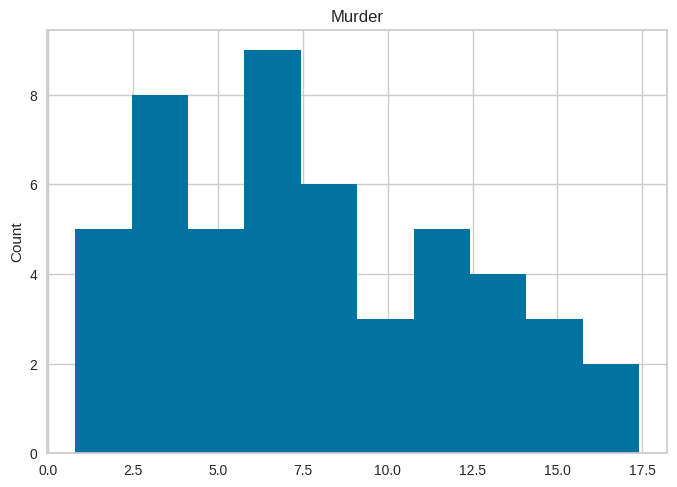

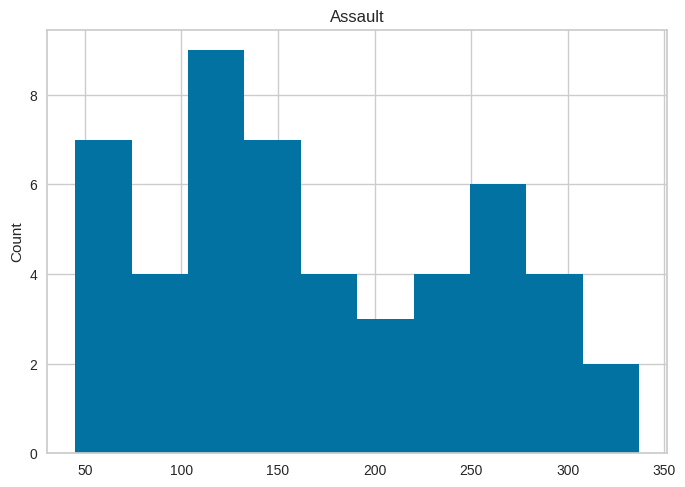

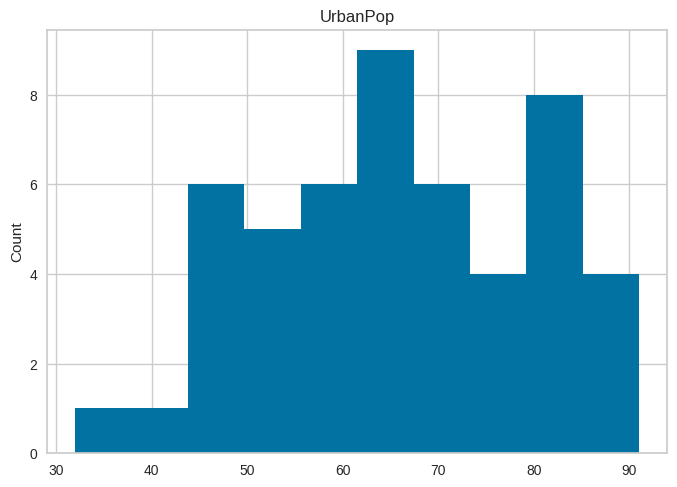

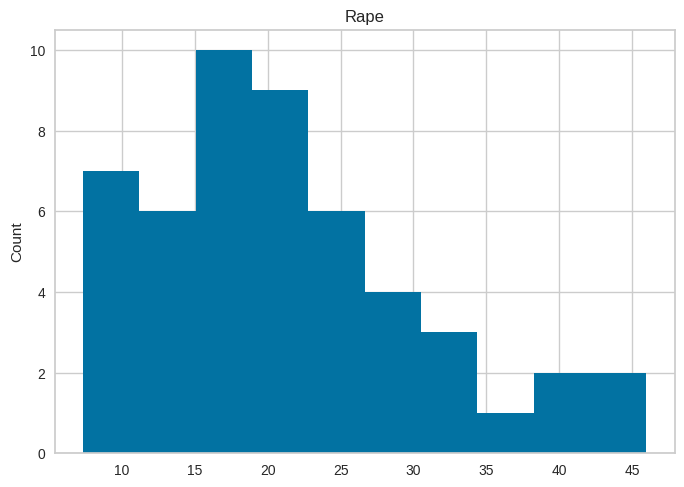

In [ ]:
for feature in crime.columns:
    crime=crime.copy()
    crime[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

States


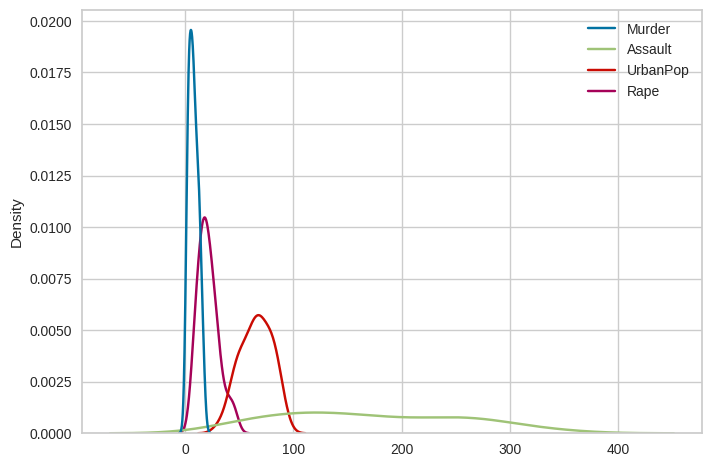

Murder


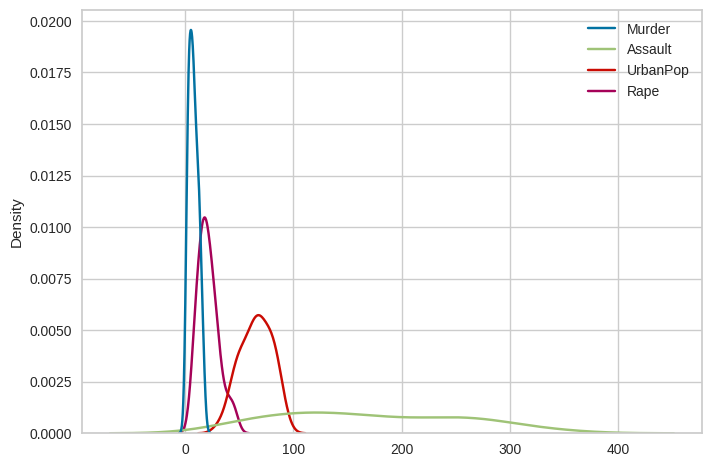

Assault


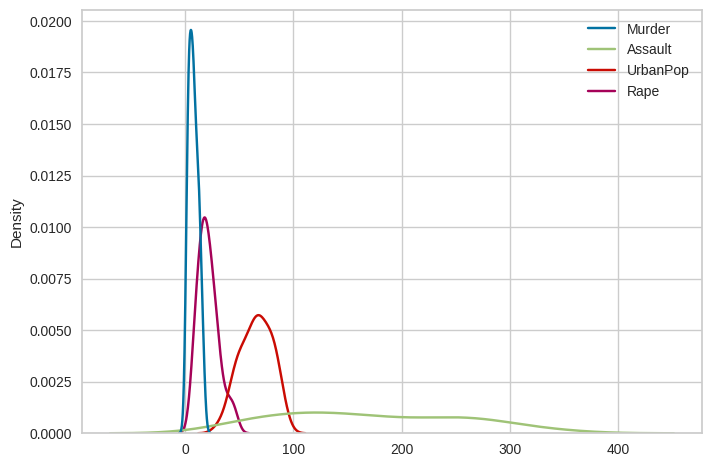

UrbanPop


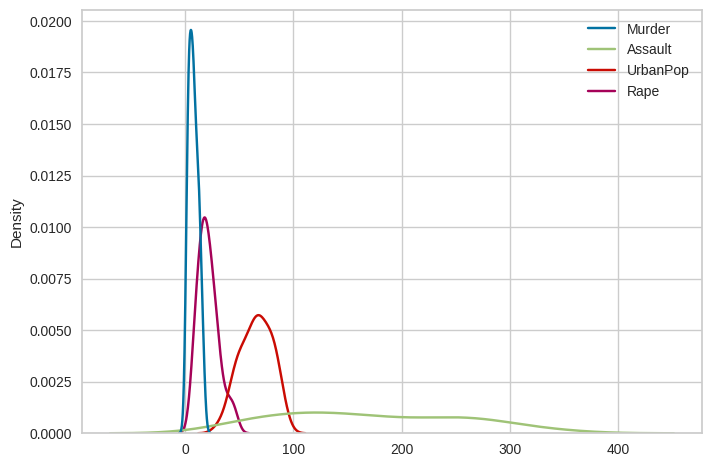

Rape


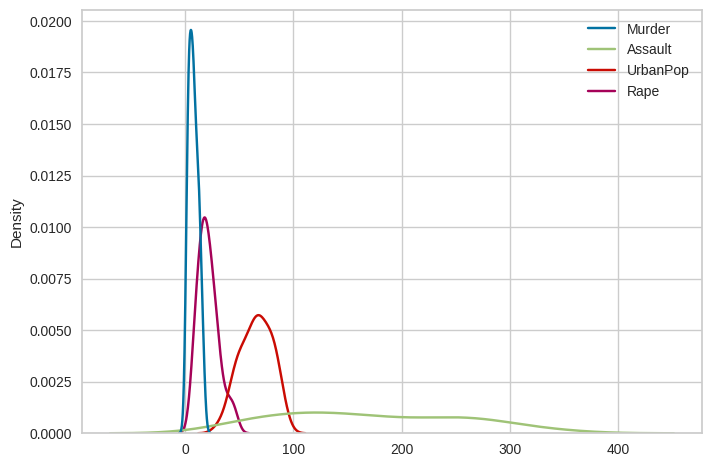

In [ ]:
for n in crime.columns:
    print(n)
    sns.kdeplot(crime) #sns.kdeplot(crime[n])
    plt.show()

#Outliers Detection

In [ ]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

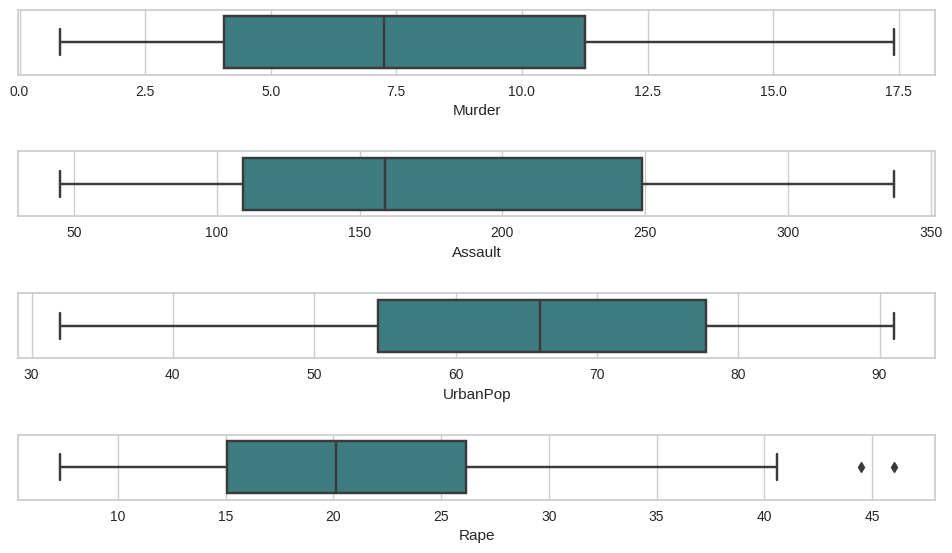

In [ ]:
ot=crime.copy()
fig,axes=plt.subplots(4,1,figsize=(10,6),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)




<Axes: >

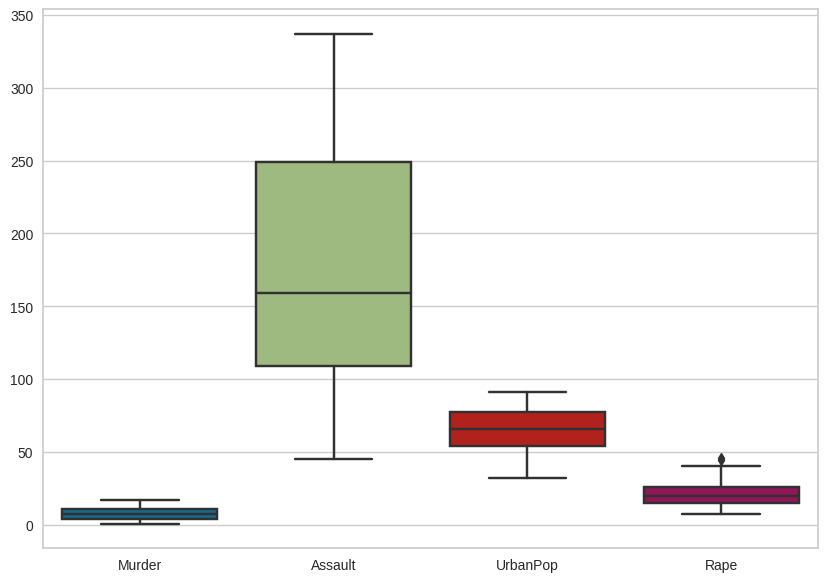

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=crime)


#Data Visualization

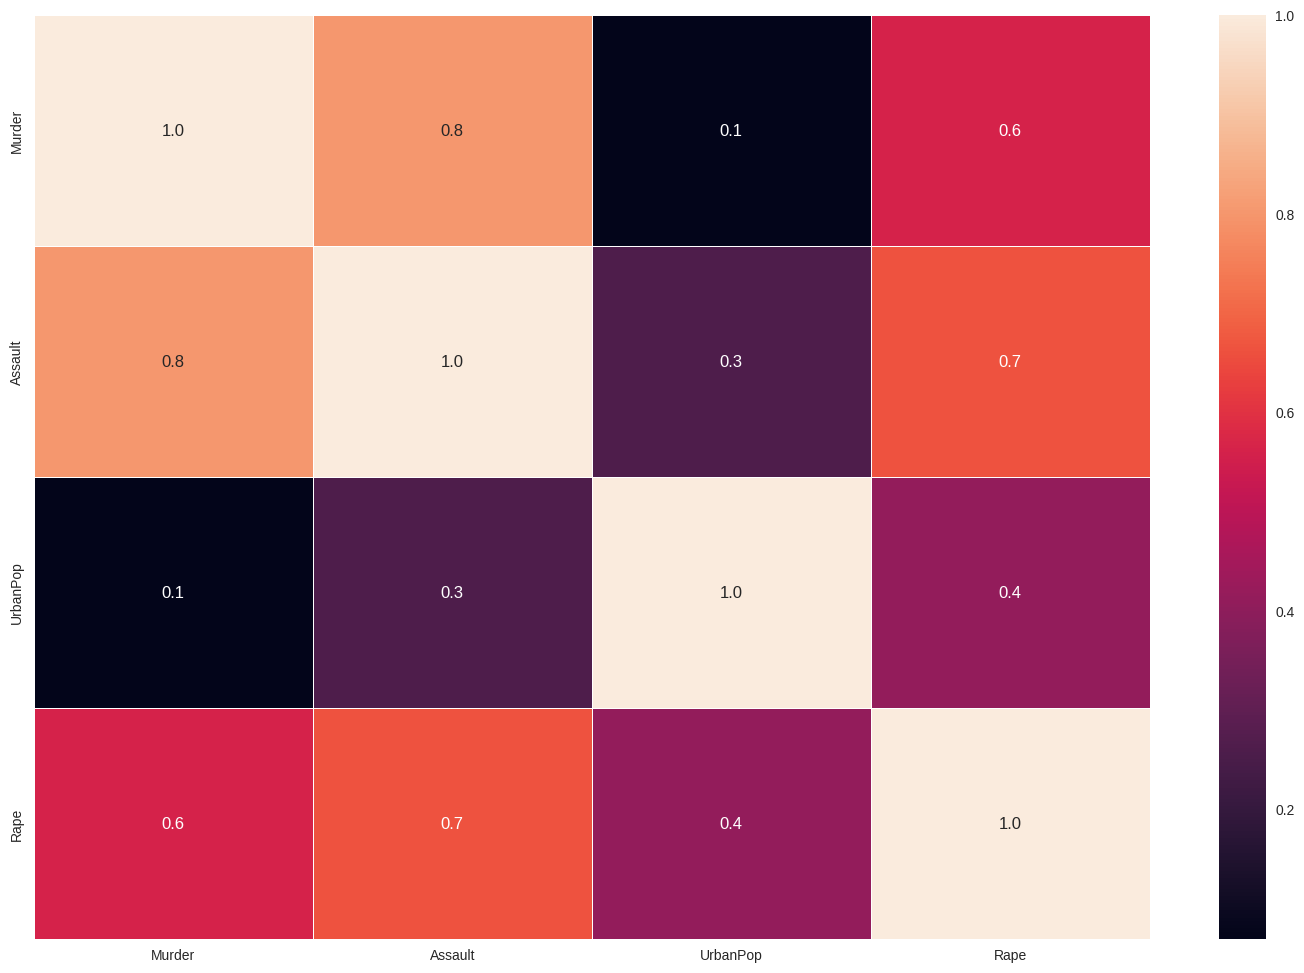

In [ ]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(crime.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

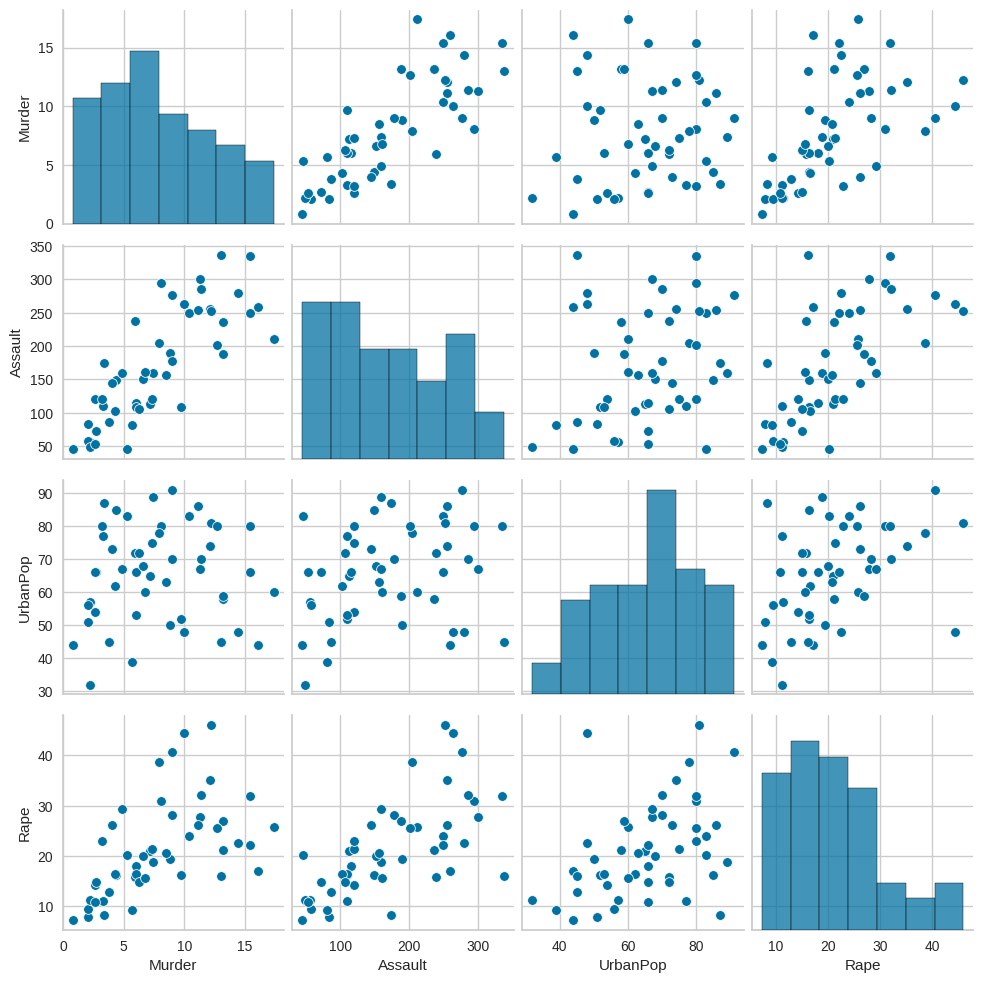

In [ ]:
sns.pairplot(crime)
plt.show()

#Murder Rate

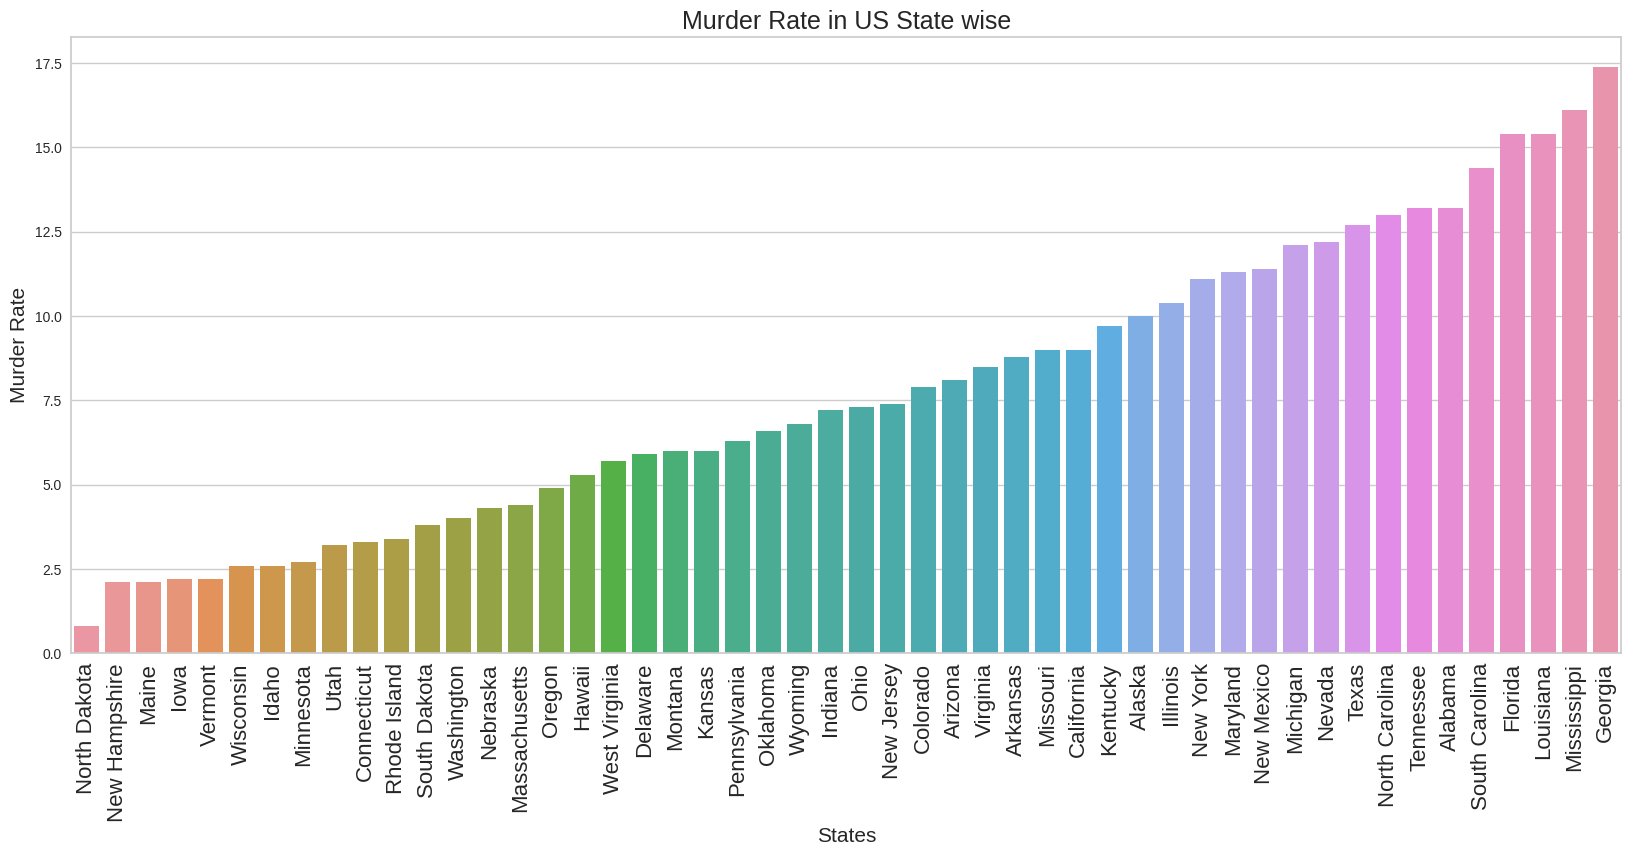

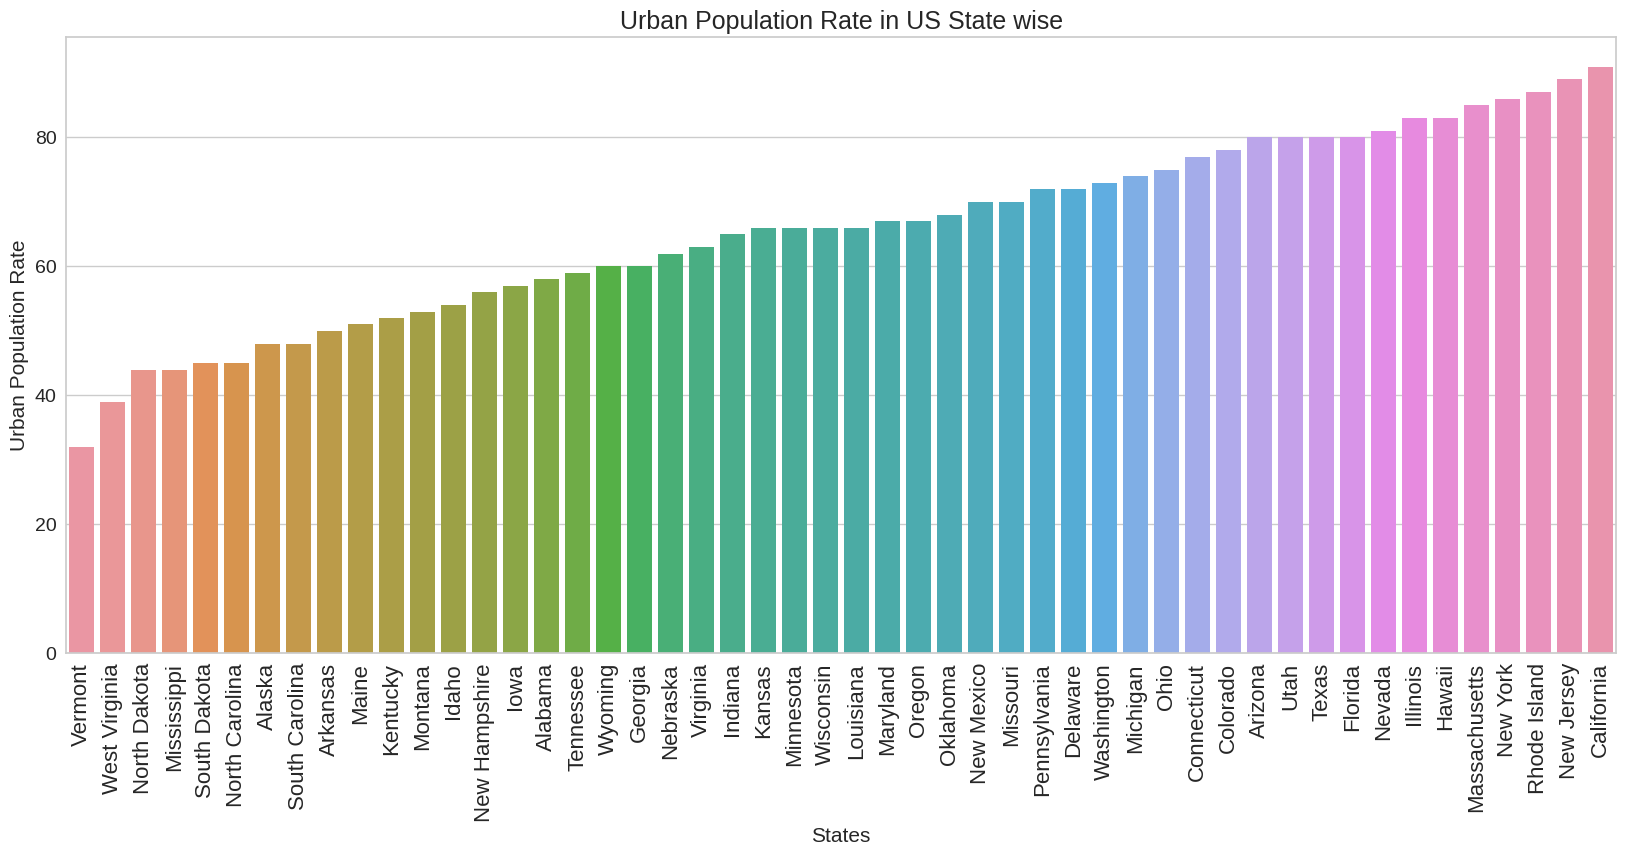

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',y='Murder',data=crime,order=crime.sort_values('Murder').States)
plt.xlabel('States',size=15)
plt.ylabel('Murder Rate',size=15)
plt.xticks(rotation=0,fontsize=14)
plt.xticks(rotation=90,fontsize=16)
plt.title('Murder Rate in US State wise',size=18)
plt.show()

plt.figure(figsize=(20,8))

sns.barplot(x='States',
            y="UrbanPop",
            data=crime,
            order=crime.sort_values('UrbanPop').States)

plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Murder Rate')
crime.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [ ]:
print('Top 10 States with Lowest Murder Rate')
crime.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [ ]:
murder = crime.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


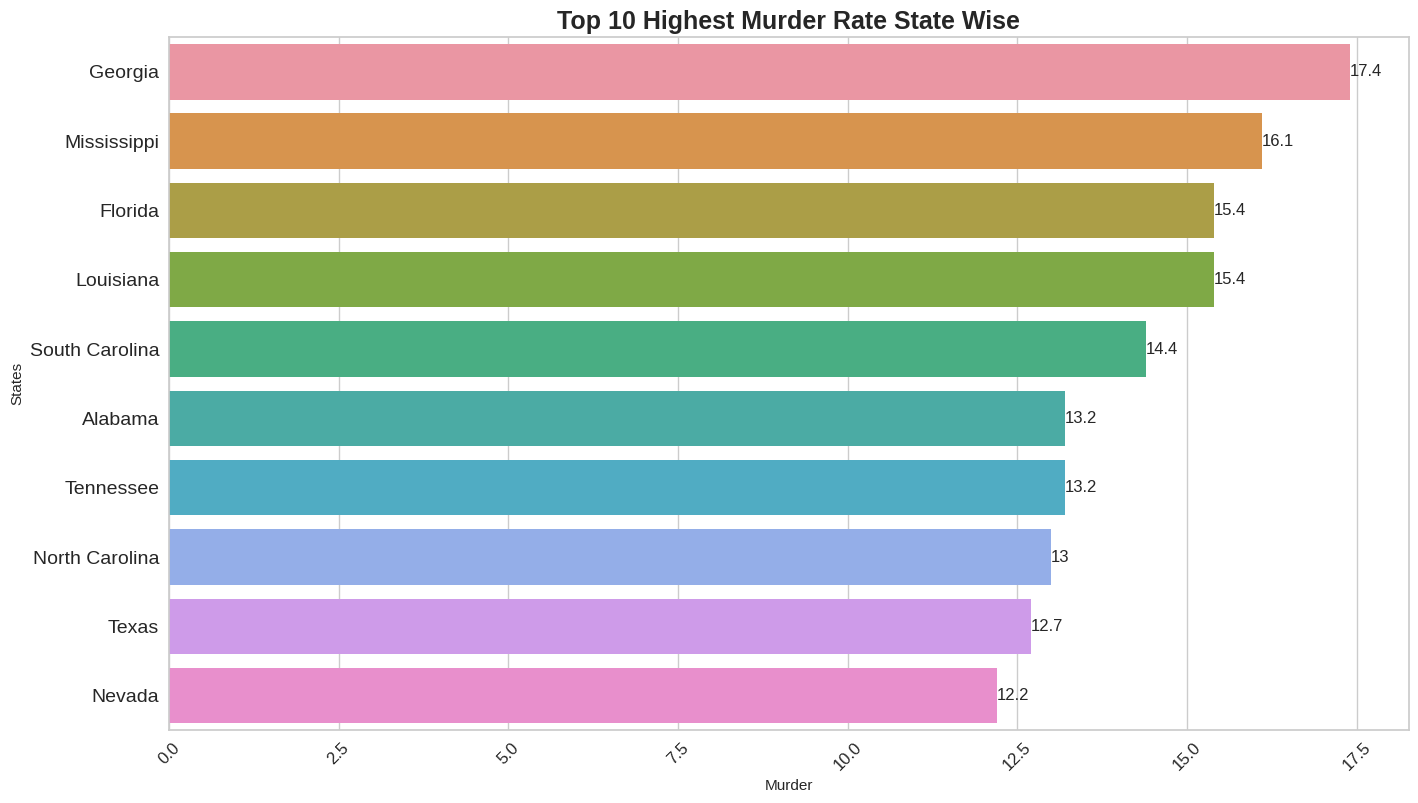

In [ ]:
plt.figure(figsize=(16,9))
ax=sns.barplot(x=murder.Murder[:10],y=murder.States[:10])
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title('Top 10 Highest Murder Rate State Wise',fontsize=18,fontweight = 'bold')
for i in ax.containers:
  ax.bar_label(i,)

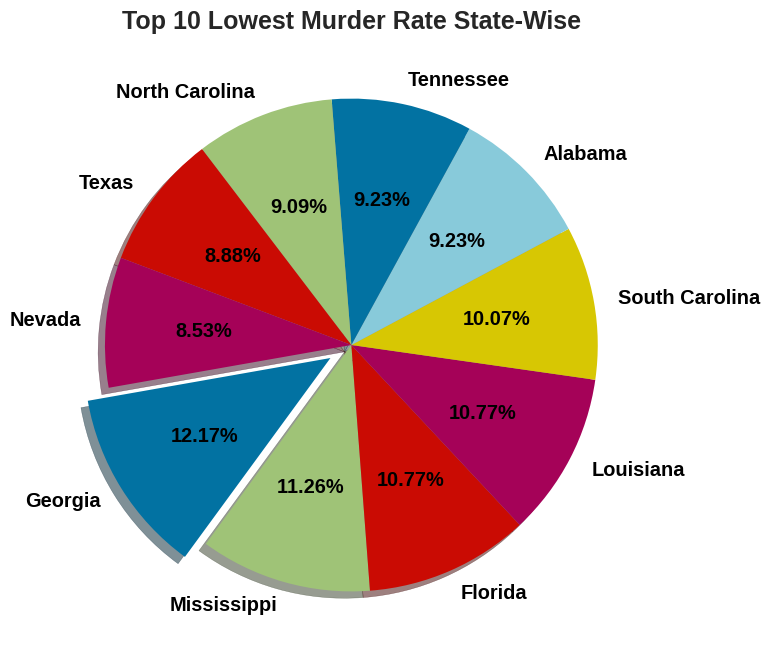

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(murder.Murder[:10],labels=murder.States[:10],explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct='%.2f%%',
        shadow=True,startangle=190,textprops={'size':'large','fontweight':'bold','rotation':'horizontal','color':'black'})

plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()


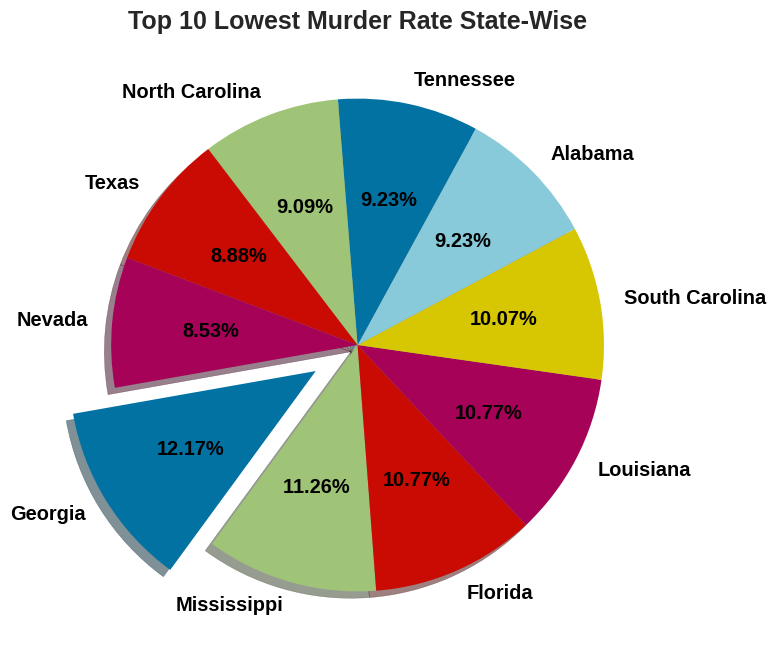

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(murder.Murder[:10],
        labels=murder.States[:10],
        explode=[0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()


#Assault Rate

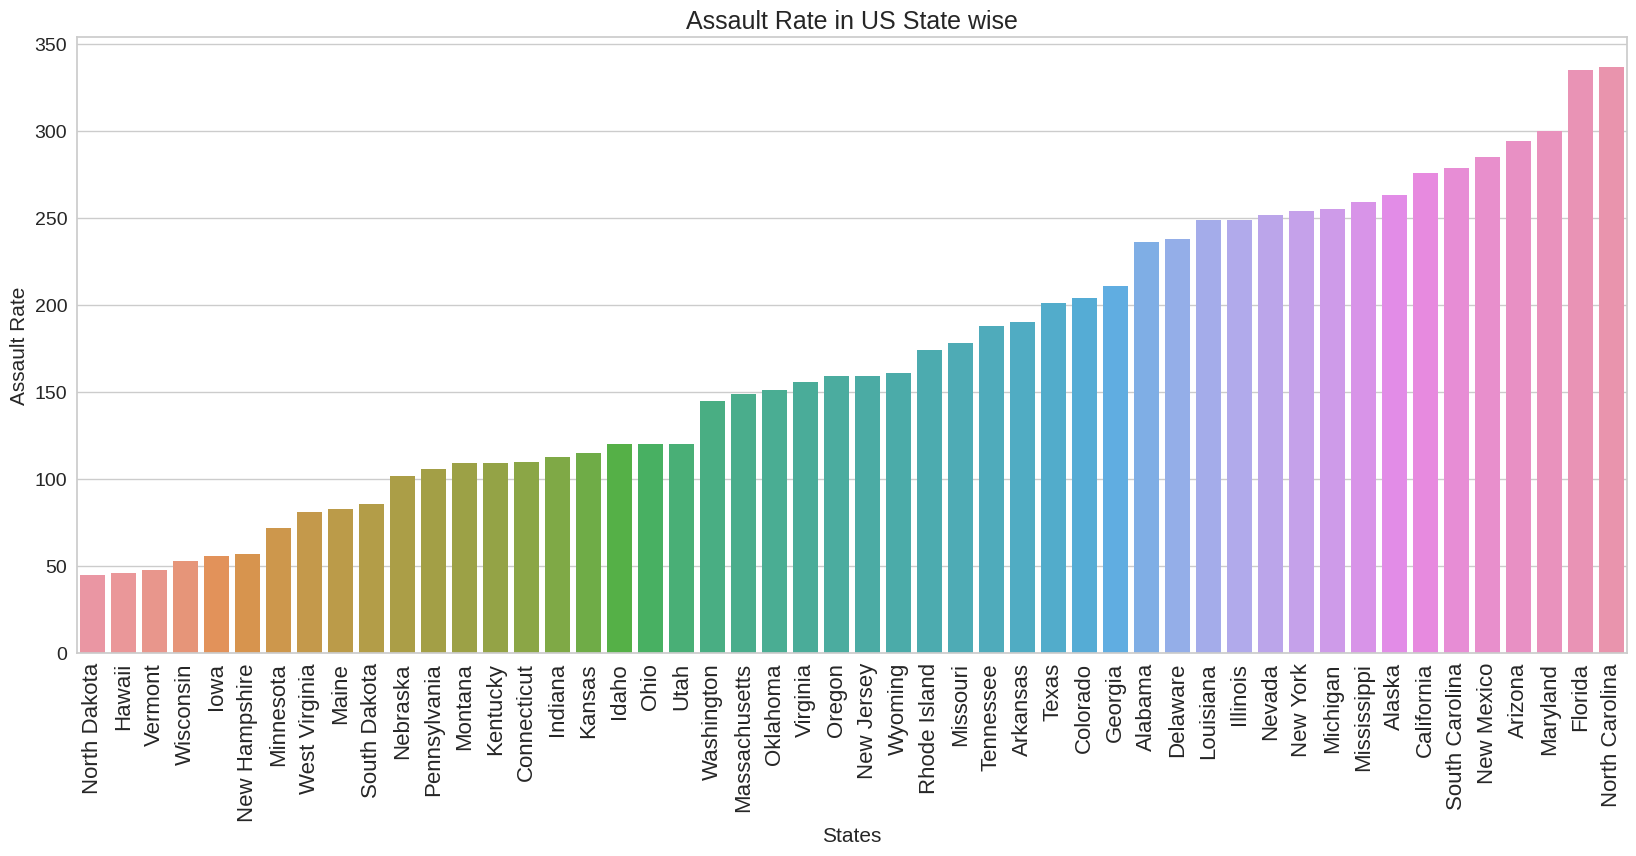

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',y='Assault',data=crime,order=crime.sort_values('Assault').States)

plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Assault Rate')
crime.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [ ]:
print('Top 10 States with Lowest Assault Rate')
crime.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


In [ ]:
Assault=crime.sort_values('Assault',ascending=False)

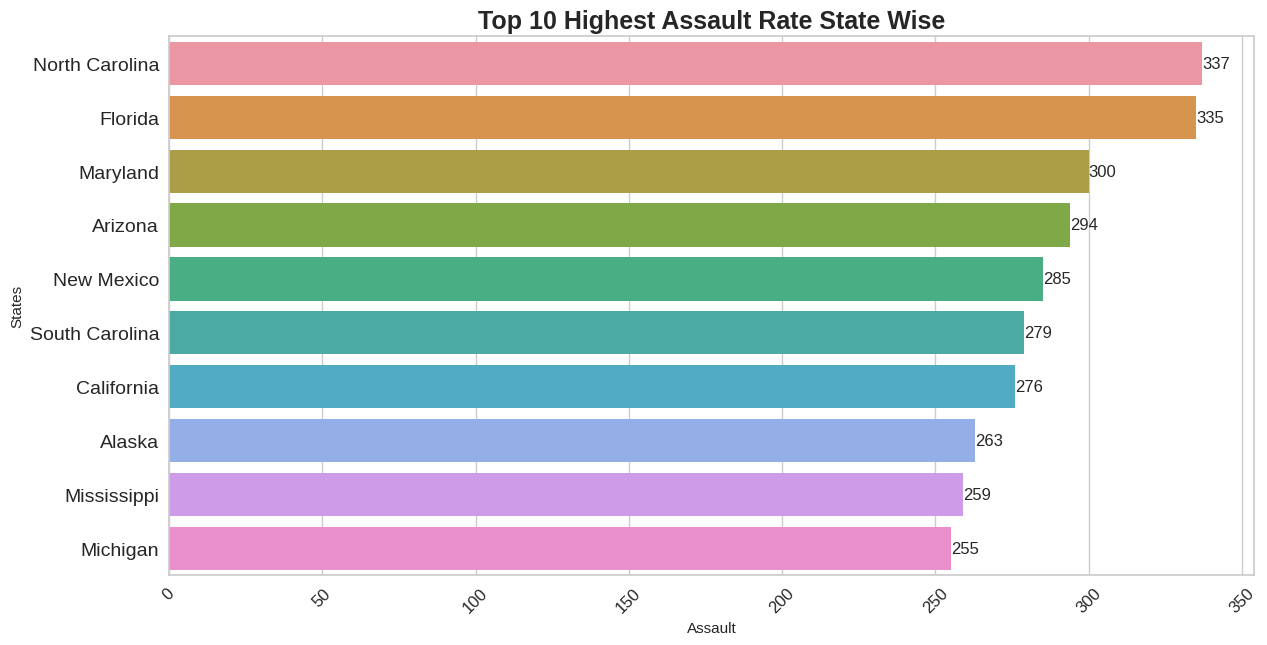

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x=Assault.Assault[:10],y=Assault.States[:10])
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
  ax.bar_label(i,)

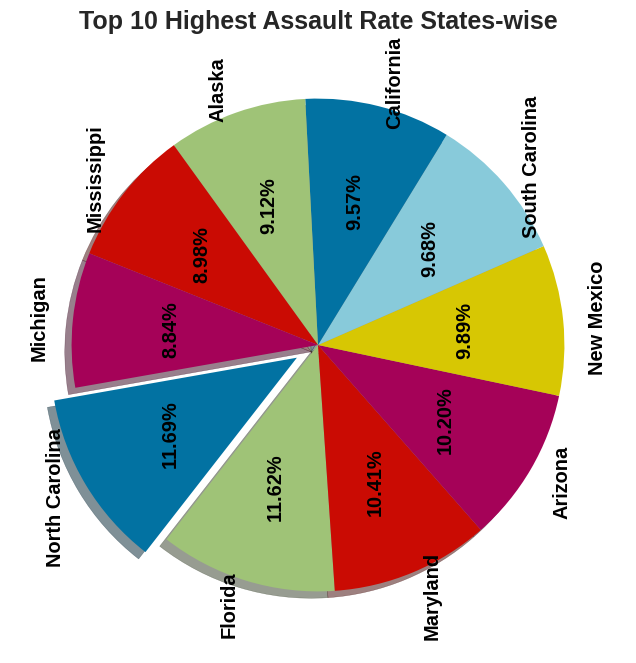

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Assault.Assault[:10],
        labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle=190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'vertical',
                   'color':'black'})

plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [ ]:
assault=crime.sort_values('Assault',ascending=True)

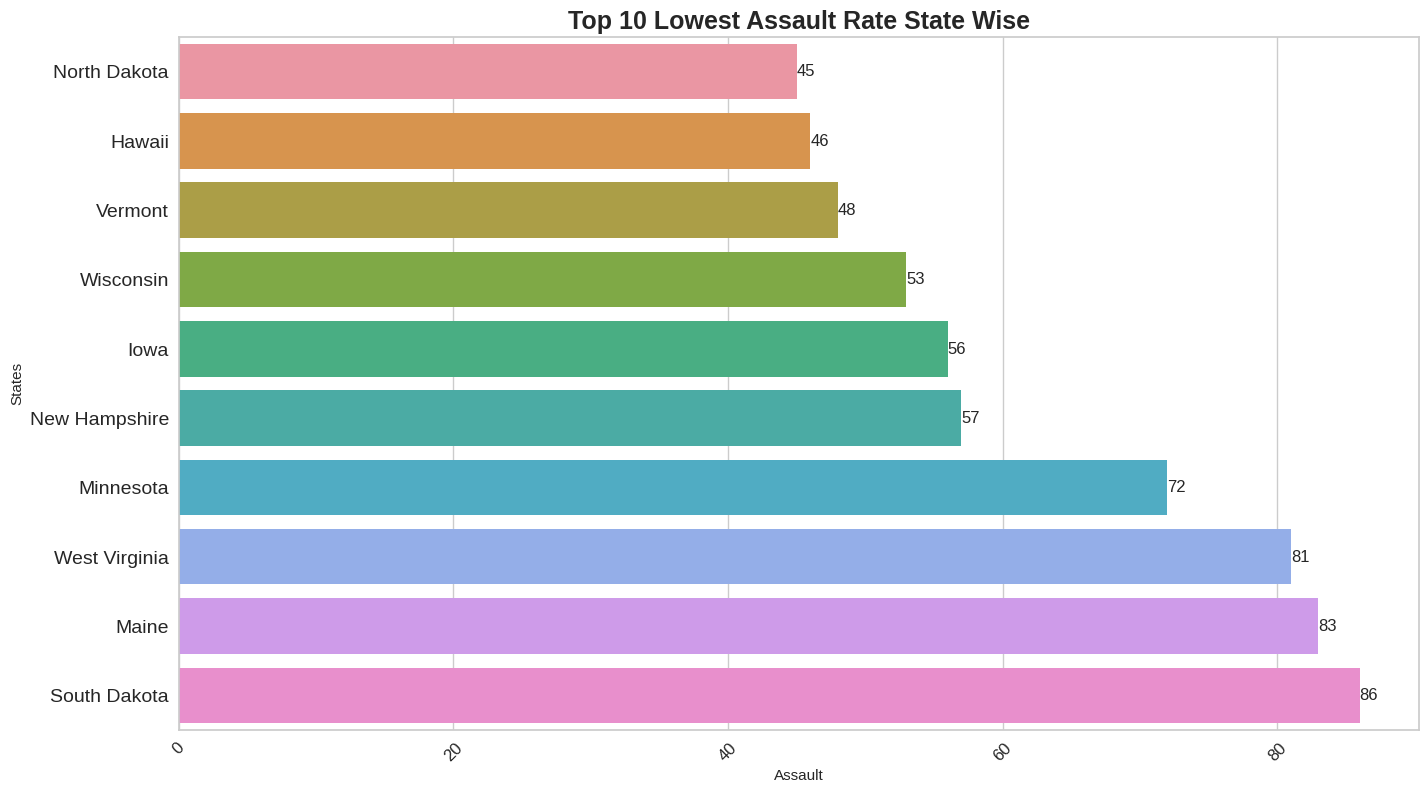

In [ ]:
plt.figure(figsize=(16,9))
ax=sns.barplot(x=assault.Assault[:10],y=assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

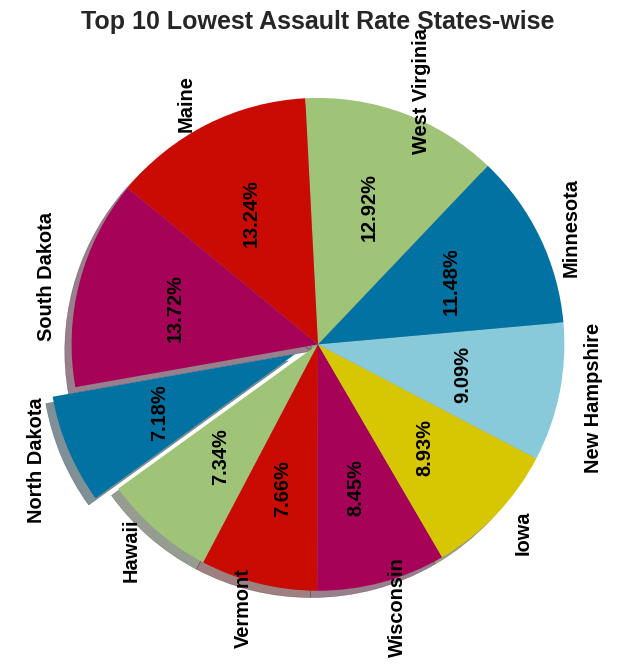

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(assault.Assault[:10],
       labels=assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'vertical',
                   'color':'black'})

plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()


#Rape Rate

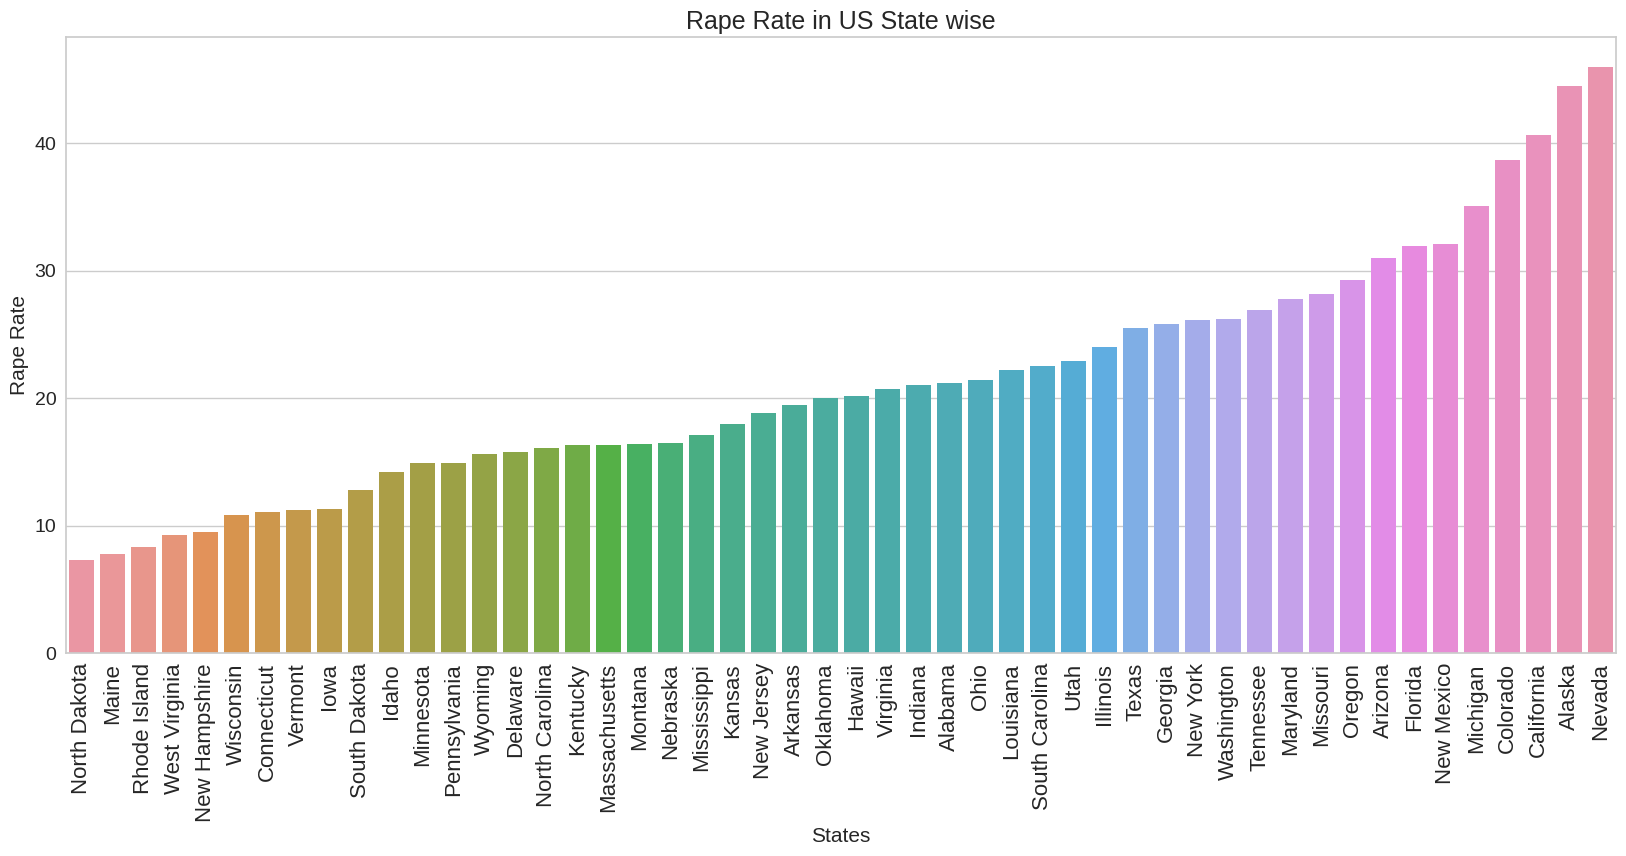

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',y='Rape',data=crime,order=crime.sort_values('Rape').States)
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Rape Rate')
crime.sort_values('Rape',ascending=False,ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [ ]:
print('Top 10 States with Lowest Rape Rate')
crime.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


In [ ]:
Rape = crime.sort_values('Rape', ascending = False)

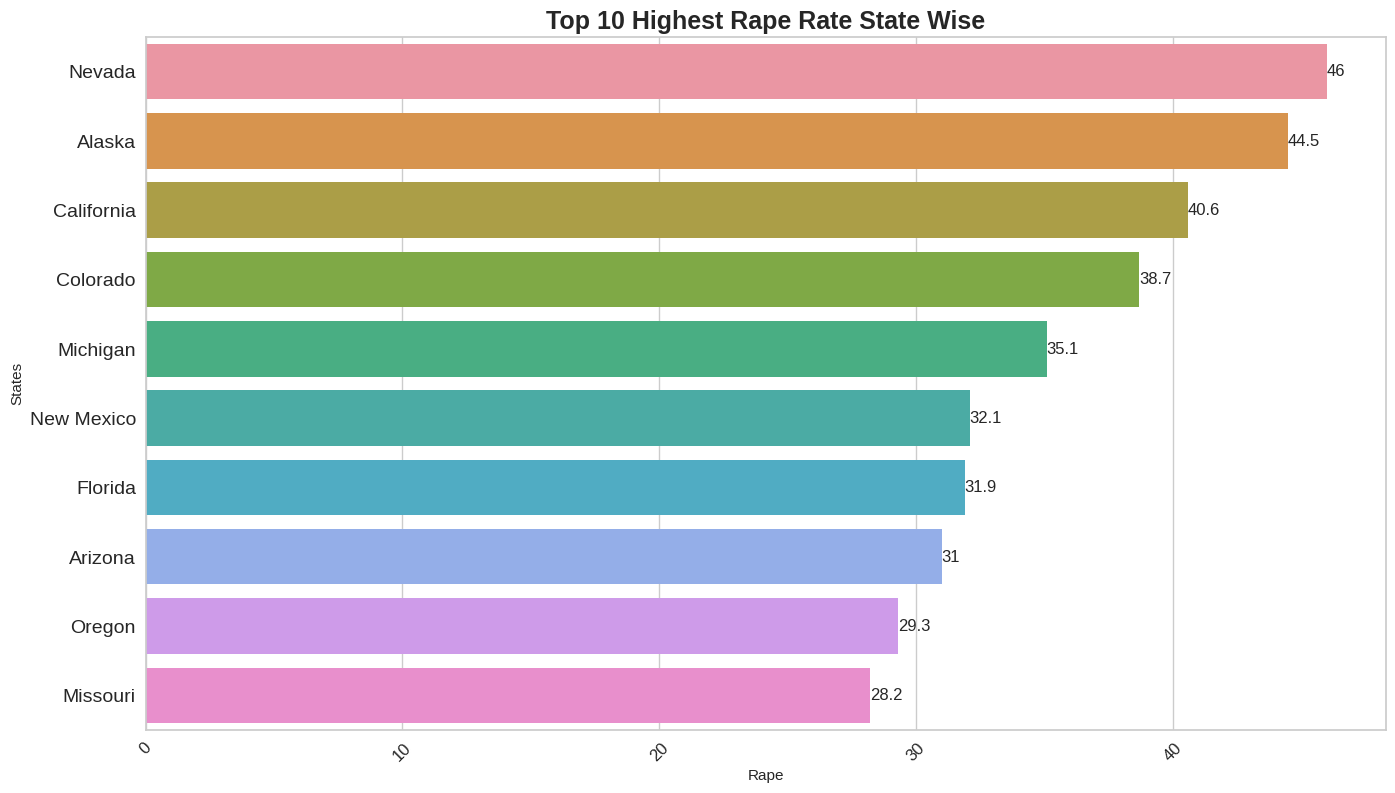

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

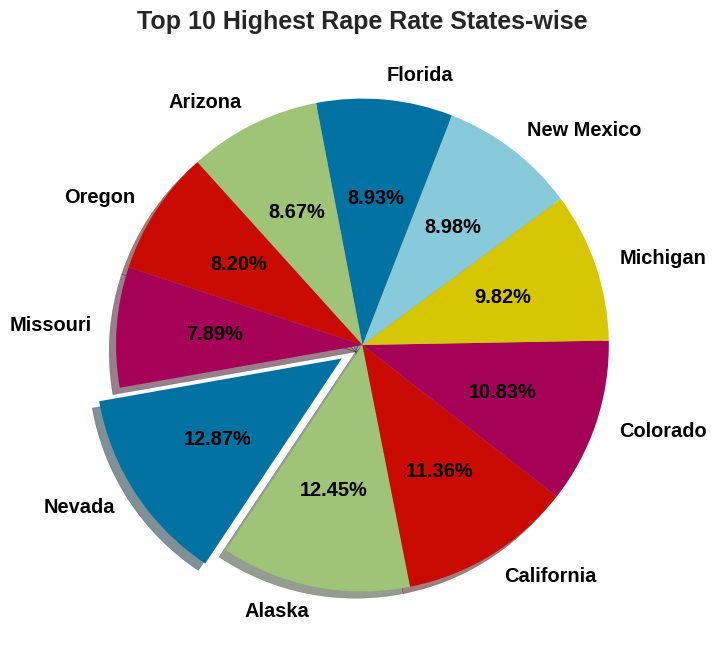

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(Rape.Rape[:10],
       labels=Rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation': 'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

#Urban Population Rate

In [ ]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

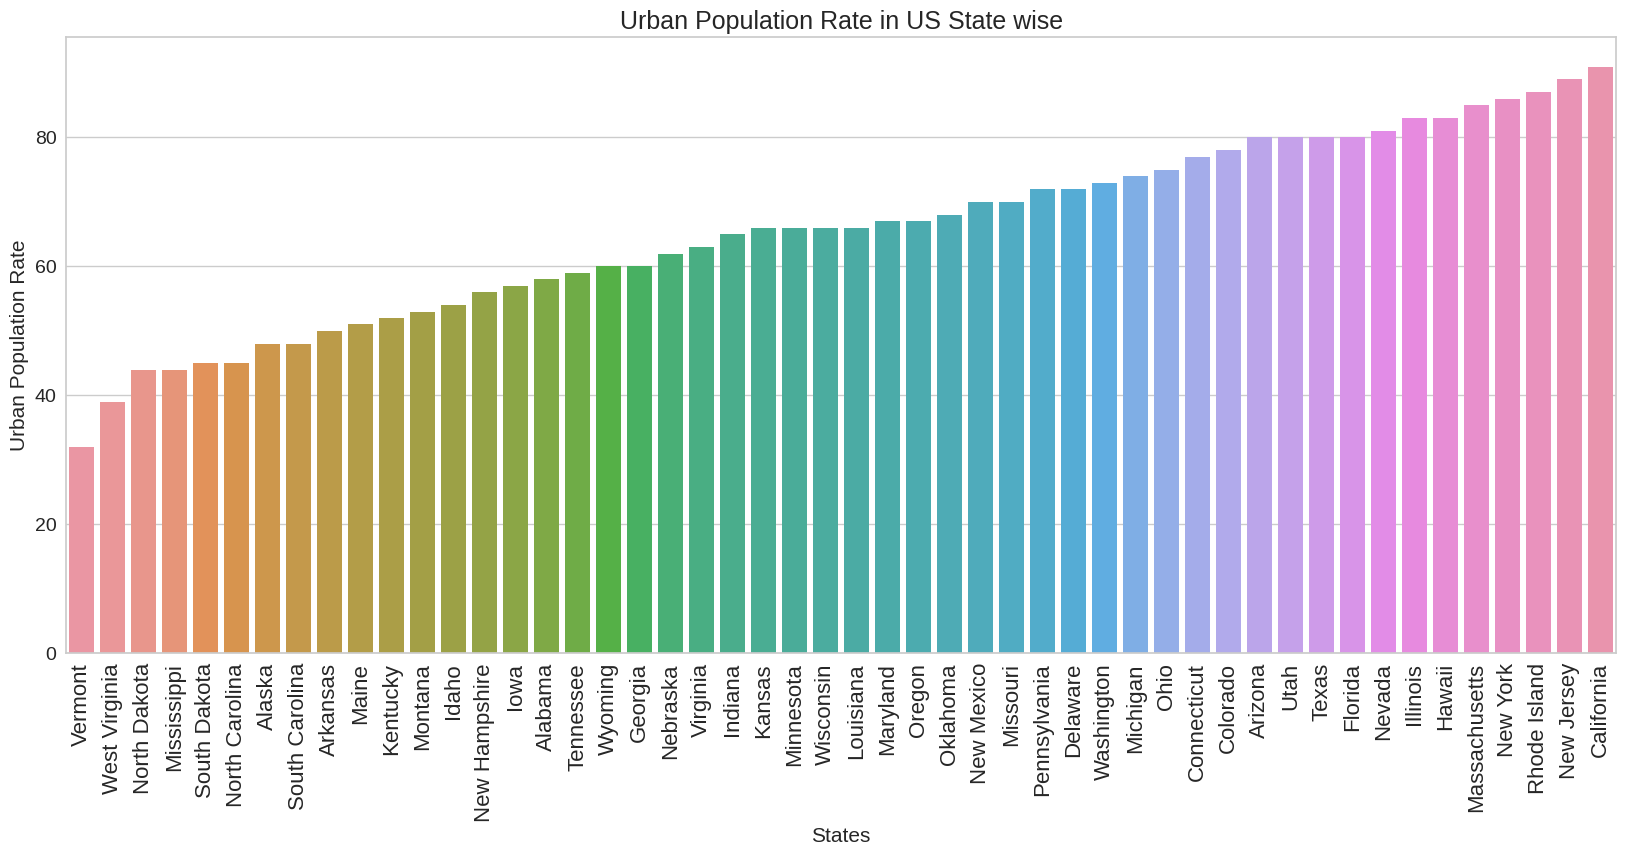

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',y='UrbanPop',data=crime,order=crime.sort_values('UrbanPop').States)
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Urban Population Rate')
crime.sort_values('UrbanPop',ascending=False,ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [ ]:
print('Top 10 States with Lowest Urban Population Rate')
crime.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


In [ ]:
urbanpop=crime.sort_values('UrbanPop',ascending=False)

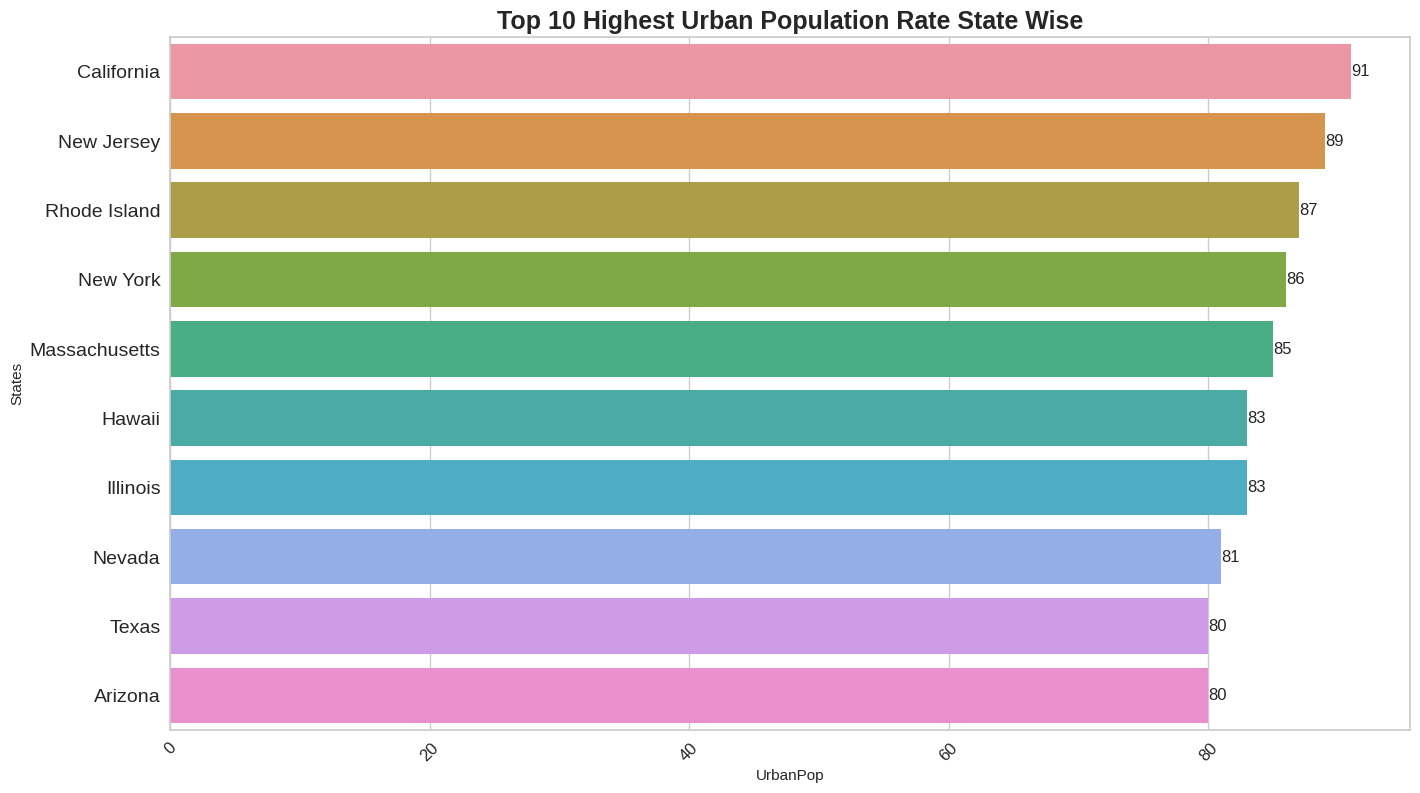

In [ ]:
plt.figure(figsize=(16,9))
ax=sns.barplot(x=urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


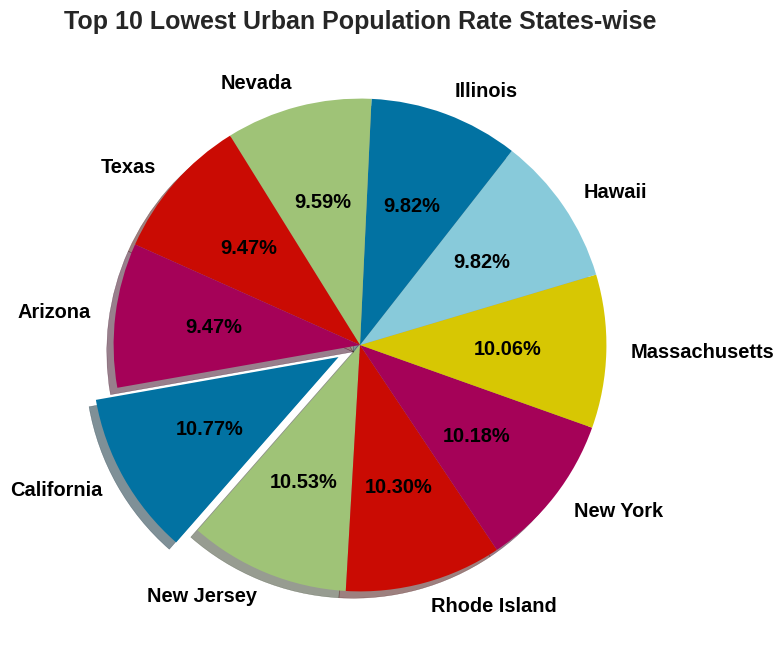

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()


In [ ]:
#Data Preprocessing
df=crime.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
standard_scaler=StandardScaler()
std_df=standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

minmax_df=minmax.fit_transform(df)
minmax_df.shape

(50, 4)

# KMeans Clustering

In [ ]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
  clusters=KMeans(num_clusters,n_init=10)
  clusters.fit(std_df)
  labels=clusters.labels_
  centroids=clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.076563
5,6,44.695340
6,7,39.201520
7,8,36.095498
8,9,32.589249
9,10,29.154111


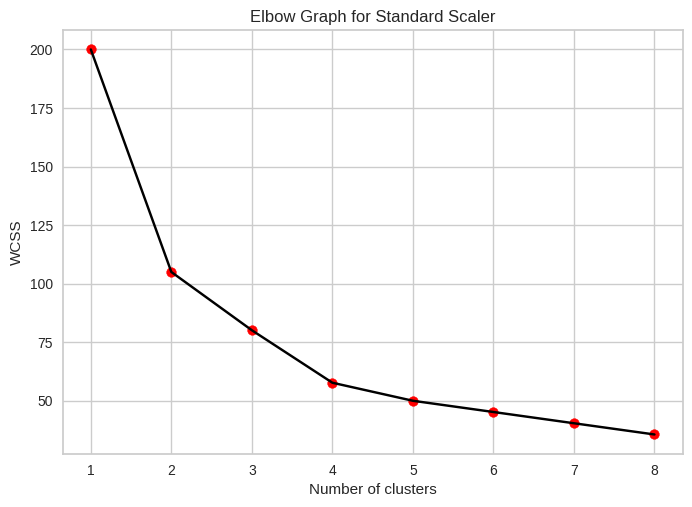

In [ ]:
from ipykernel.kernelbase import kernel_protocol_version
wcss=[]
for i in range(1,9):
     kmeans=KMeans(n_clusters=i,random_state=2)
     kmeans.fit(std_df)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from yellowbrick import cluster
from yellowbrick.contrib.wrapper import clusterer
clust_list=[2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(std_df)
    sil_score1=sil(std_df,cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


In [ ]:
model_kmeans=KMeans(n_clusters=3,random_state=0,init='k-means++')
y_predict_kmeans=model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [ ]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [ ]:
model_kmeans.inertia_

80.0888613219962

In [ ]:
df['Kmeans_label']=model_kmeans.labels_

In [ ]:
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [ ]:
df[df['Kmeans_label']==0]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Idaho,2.6,120,54,14.2,0
Iowa,2.2,56,57,11.3,0
Kentucky,9.7,109,52,16.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0


In [ ]:
df[df['Kmeans_label']==1]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [ ]:
df[df['Kmeans_label']==2]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Arkansas,8.8,190,50,19.5,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2


In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.010878
3,4,3.683456
4,5,3.206294
5,6,2.817659
6,7,2.567268
7,8,2.368058
8,9,2.162313
9,10,1.864878


#Hierarchical Clustering

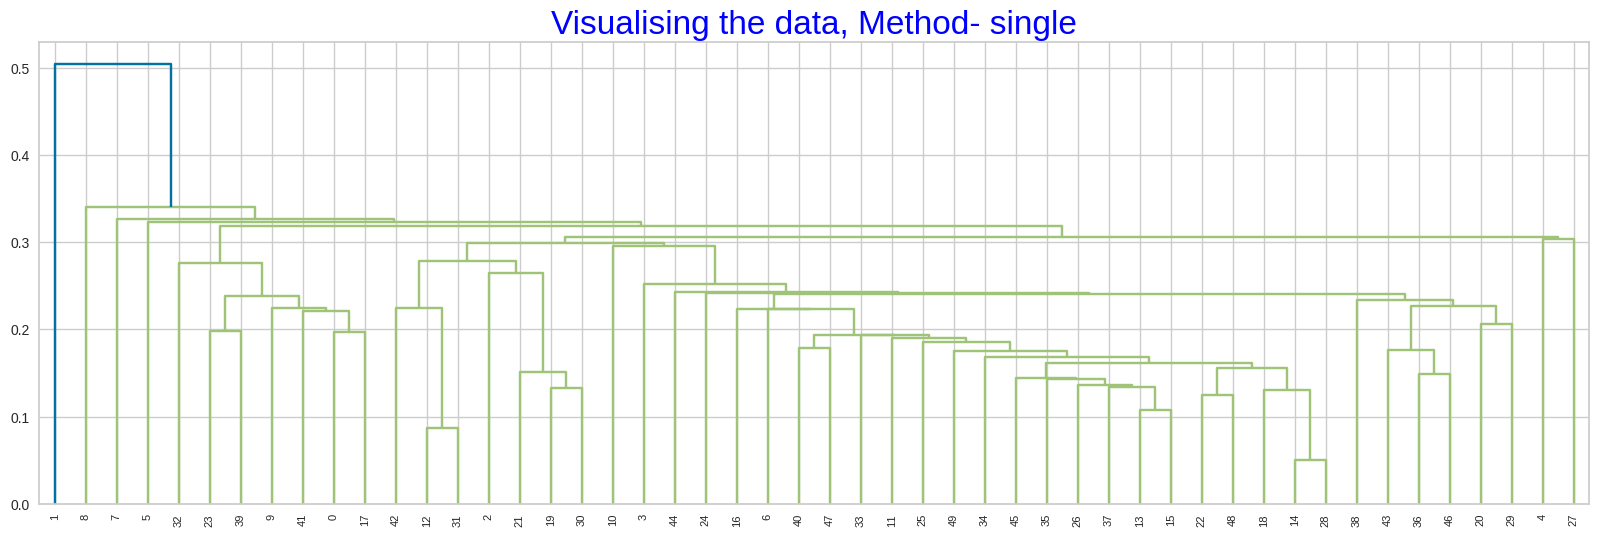

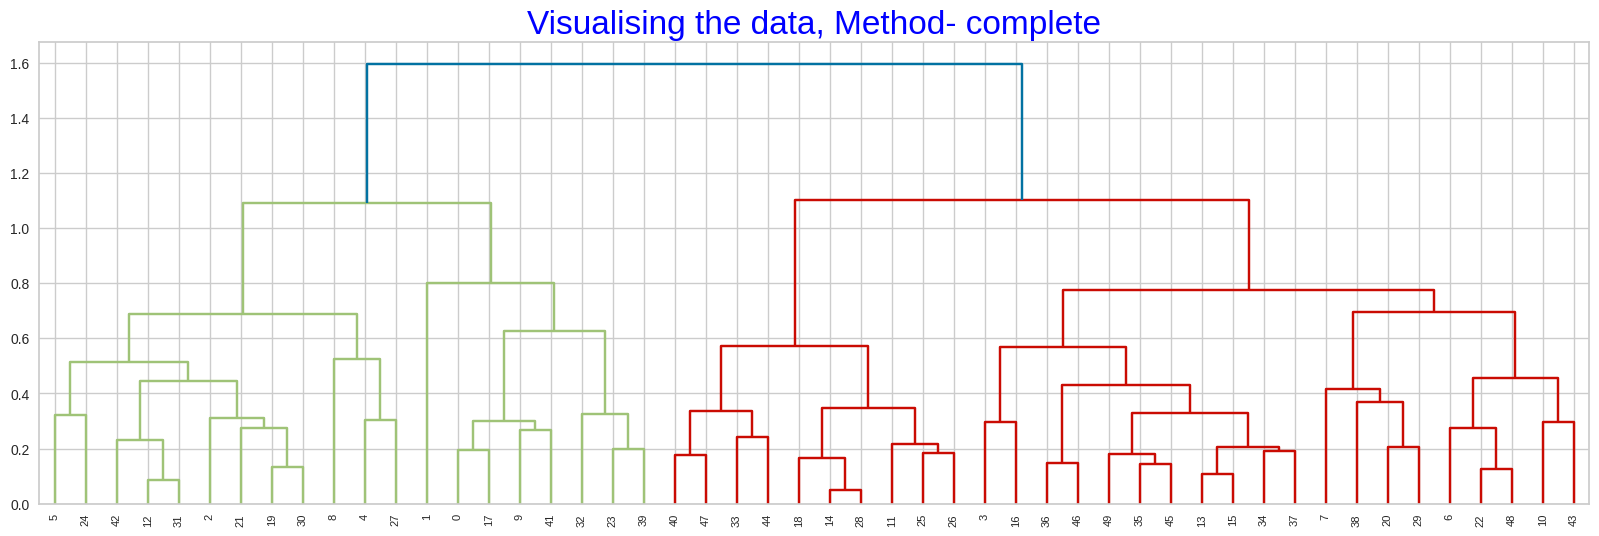

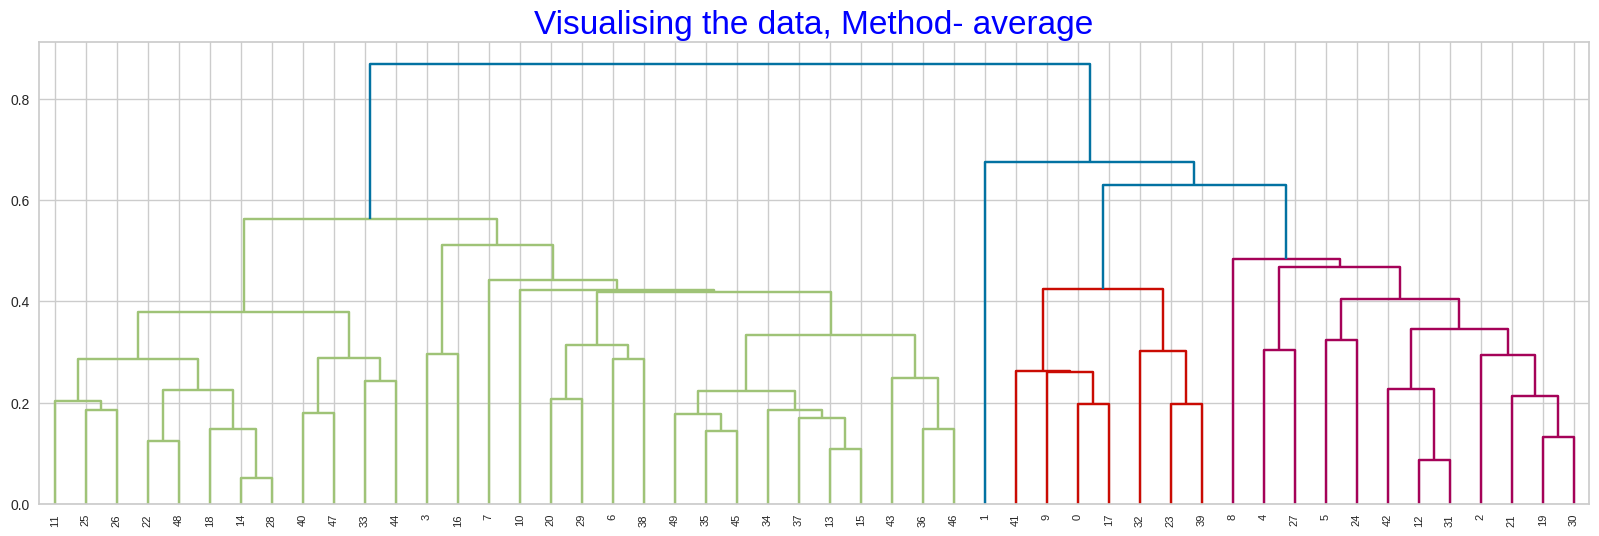

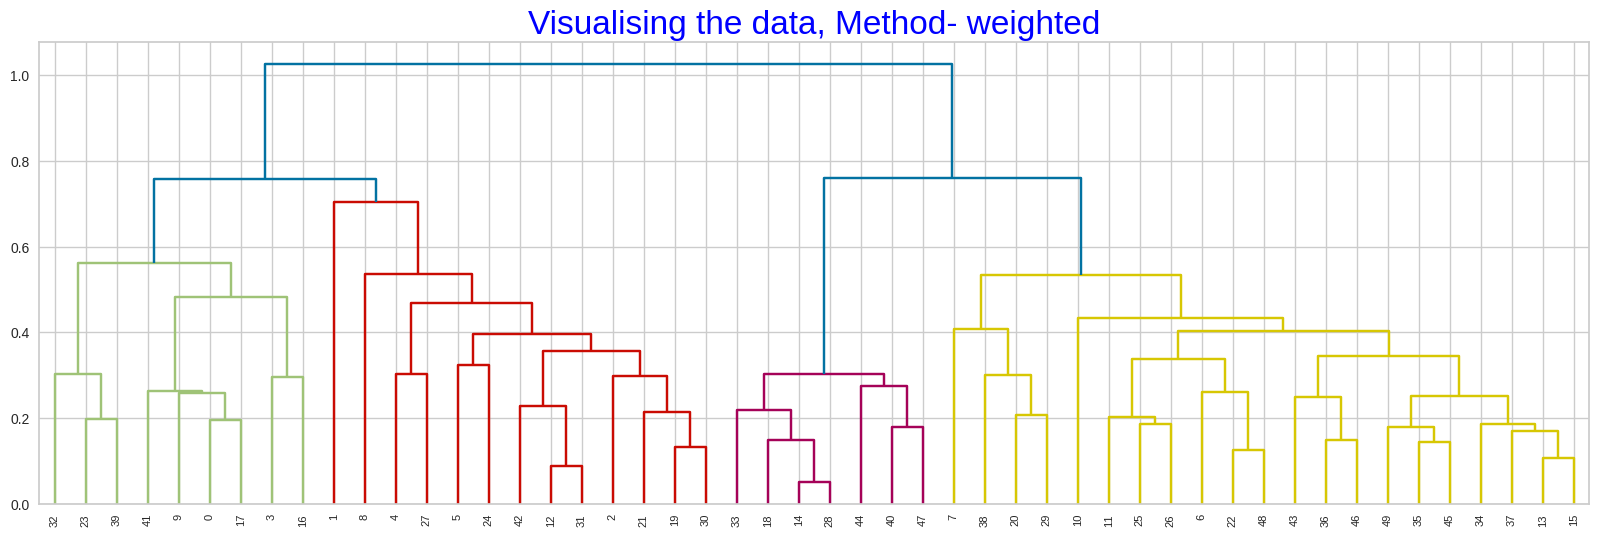

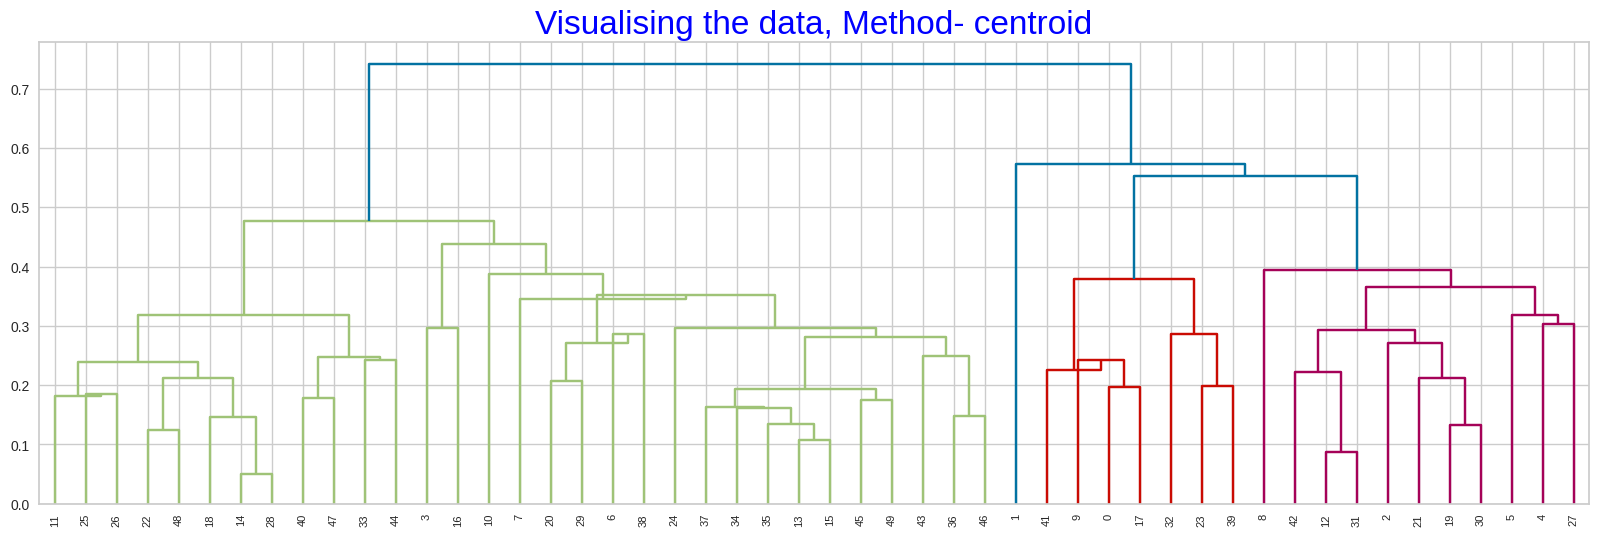

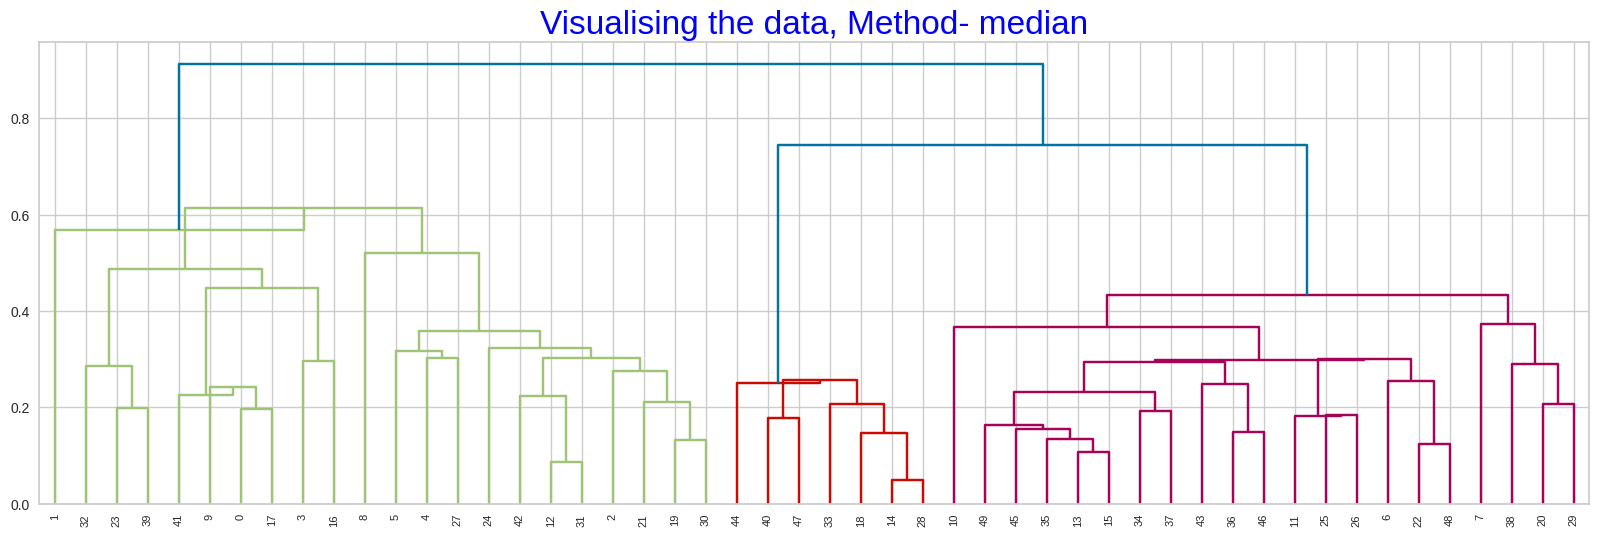

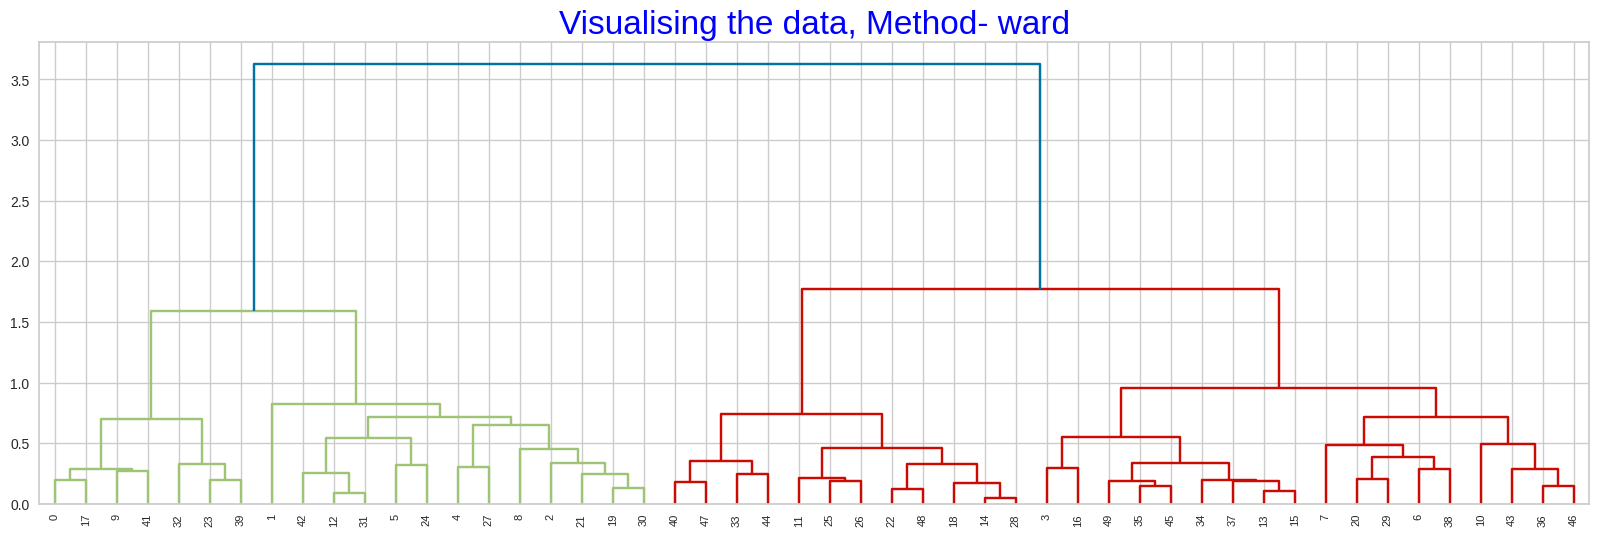

In [ ]:
for method in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict={'fontsize':24,'fontweight':16,'color':'blue'}

    plt.title('Visualising the data, Method- {}'.format(method),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method =method,optimal_ordering=False))

In [ ]:
n_clusters=[2,3,4,5,6,7,8]

for n_clusters in n_clusters:
  for linkages in ['ward','complete','average','single']:
    hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
    hie_labels1 = hie_cluster1.fit_predict(minmax_df)
    silhouette_score1 = sil(minmax_df, hie_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074

For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074

For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063

For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583

For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308

For n_clusters = 4 The average silhouette_score with linkage- average : 0.369923

In [ ]:
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

In [ ]:
#Agglomerative Clustering
agg_clustering=AgglomerativeClustering(n_clusters=2,linkage='ward')
y_pred_hie=agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
agg_clustering.n_clusters_

2

In [ ]:
(sil(minmax_df,agg_clustering.labels_)*100).round(3)

42.364

In [ ]:
df['Hierarchical_labels'] = agg_clustering.labels_

In [ ]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,4.870,114.433333,63.633333,15.943333,1.133333
1,12.165,255.250000,68.400000,29.165000,1.050000


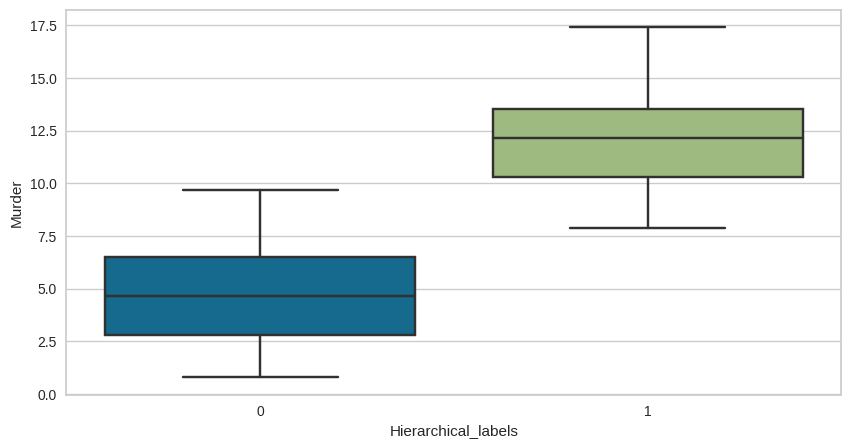

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)
plt.show()

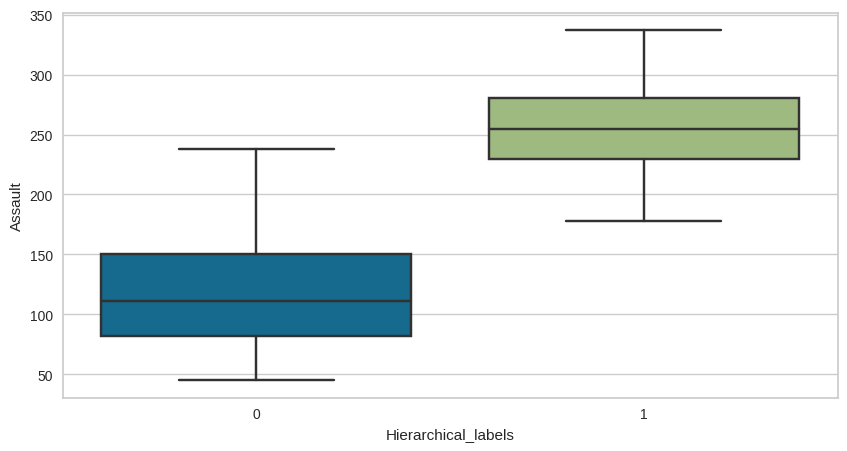

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)
plt.show()

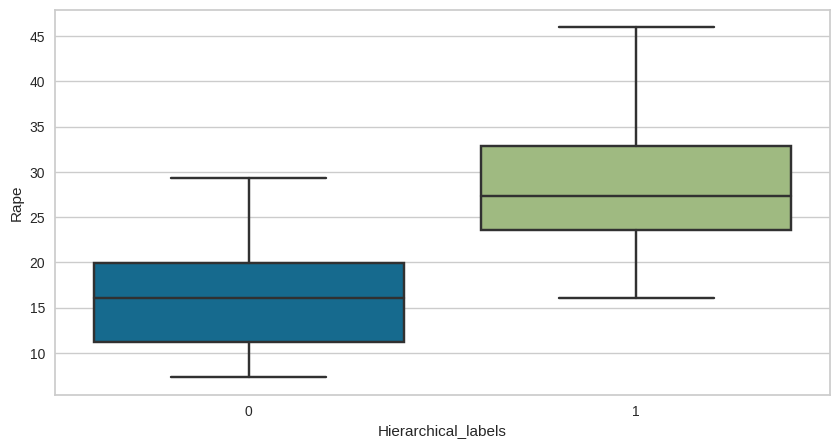

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)
plt.show()

#DBSCAN-(Density Based Spatial Clustering of Applications with Noise)

In [ ]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(std_df)

DBSCAN(eps=0.8, min_samples=6)

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0])

In [ ]:
df['DBSCAN_labels']=dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,-1
Alaska,10.0,263,48,44.5,1,1,-1
Arizona,8.1,294,80,31.0,1,1,-1
Arkansas,8.8,190,50,19.5,2,0,-1
California,9.0,276,91,40.6,1,1,-1


In [ ]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
-1,8.009524,178.904762,65.380952,21.7500,0.97619,0.47619
0,6.625000,128.000000,66.375000,18.5125,1.75000,0.00000


In [ ]:
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: -0.095


In [ ]:
#Run DBSCAn on Standard data with optimal min_sample and epsilon values
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [ ]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,2,0,0
California,9.0,276,91,40.6,1,1,0


In [ ]:
df.groupby('DBSCAN_labels').agg(['mean'])


,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,1.102041,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [ ]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [ ]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,1.102041,1.0
Hierarchical_labels,0.387755,1.0
DBSCAN_labels,0.000000,1.0
